# Ford gobike visualization project
## by Hussam Mohamed Ali Elzaphry

> The Ford gobike dataset is a one month of collective data from bike users in San Fransisco

## Preliminary Wrangling

### Step 1: Importing libraries and dataset for wrangling and cleaning
### Step 2: Exploretory points and insights to investigate
### Step 3: Explainetory conclusions and outcomes for the story

## Importing libraries
Importing pandas, numpy, matplotlib, seaborn, time, datetime, calender

In [1]:
import time
import numpy as np
import pandas as pd
import datetime
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Loading dataset for wrangling and cleaning

In [2]:
# loading dataset and first look on data
fdf = pd.read_csv('fordgobike-tripdata.csv')
fdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
fdf.info()
# see all fields, data types, and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Exploretory Part


### What is the structure of your dataset?

> A bit more than 183000 records with 15 fields of data with some null values

### What is/are the main feature(s) of interest in your dataset?

> * looks like we have timing, we could extract months, years, day hour, month day, then find best visuaization
> * duration per gender, user type, member birth year, and more
> * find relation between station id and location using longitude and latitude
> * with longitude and latitude we could visualize popular areas with heat map
> * univariant plots for categorical data like user type
> * bike id count plot per stations
> * try different graphs to see all noticable patterns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The timing and duration field are probably the most important.
> Also the user data like gender and birth year will have some direct impact on our study

In [4]:
sns.set_style('darkgrid')
# setting background style

## General look on the data

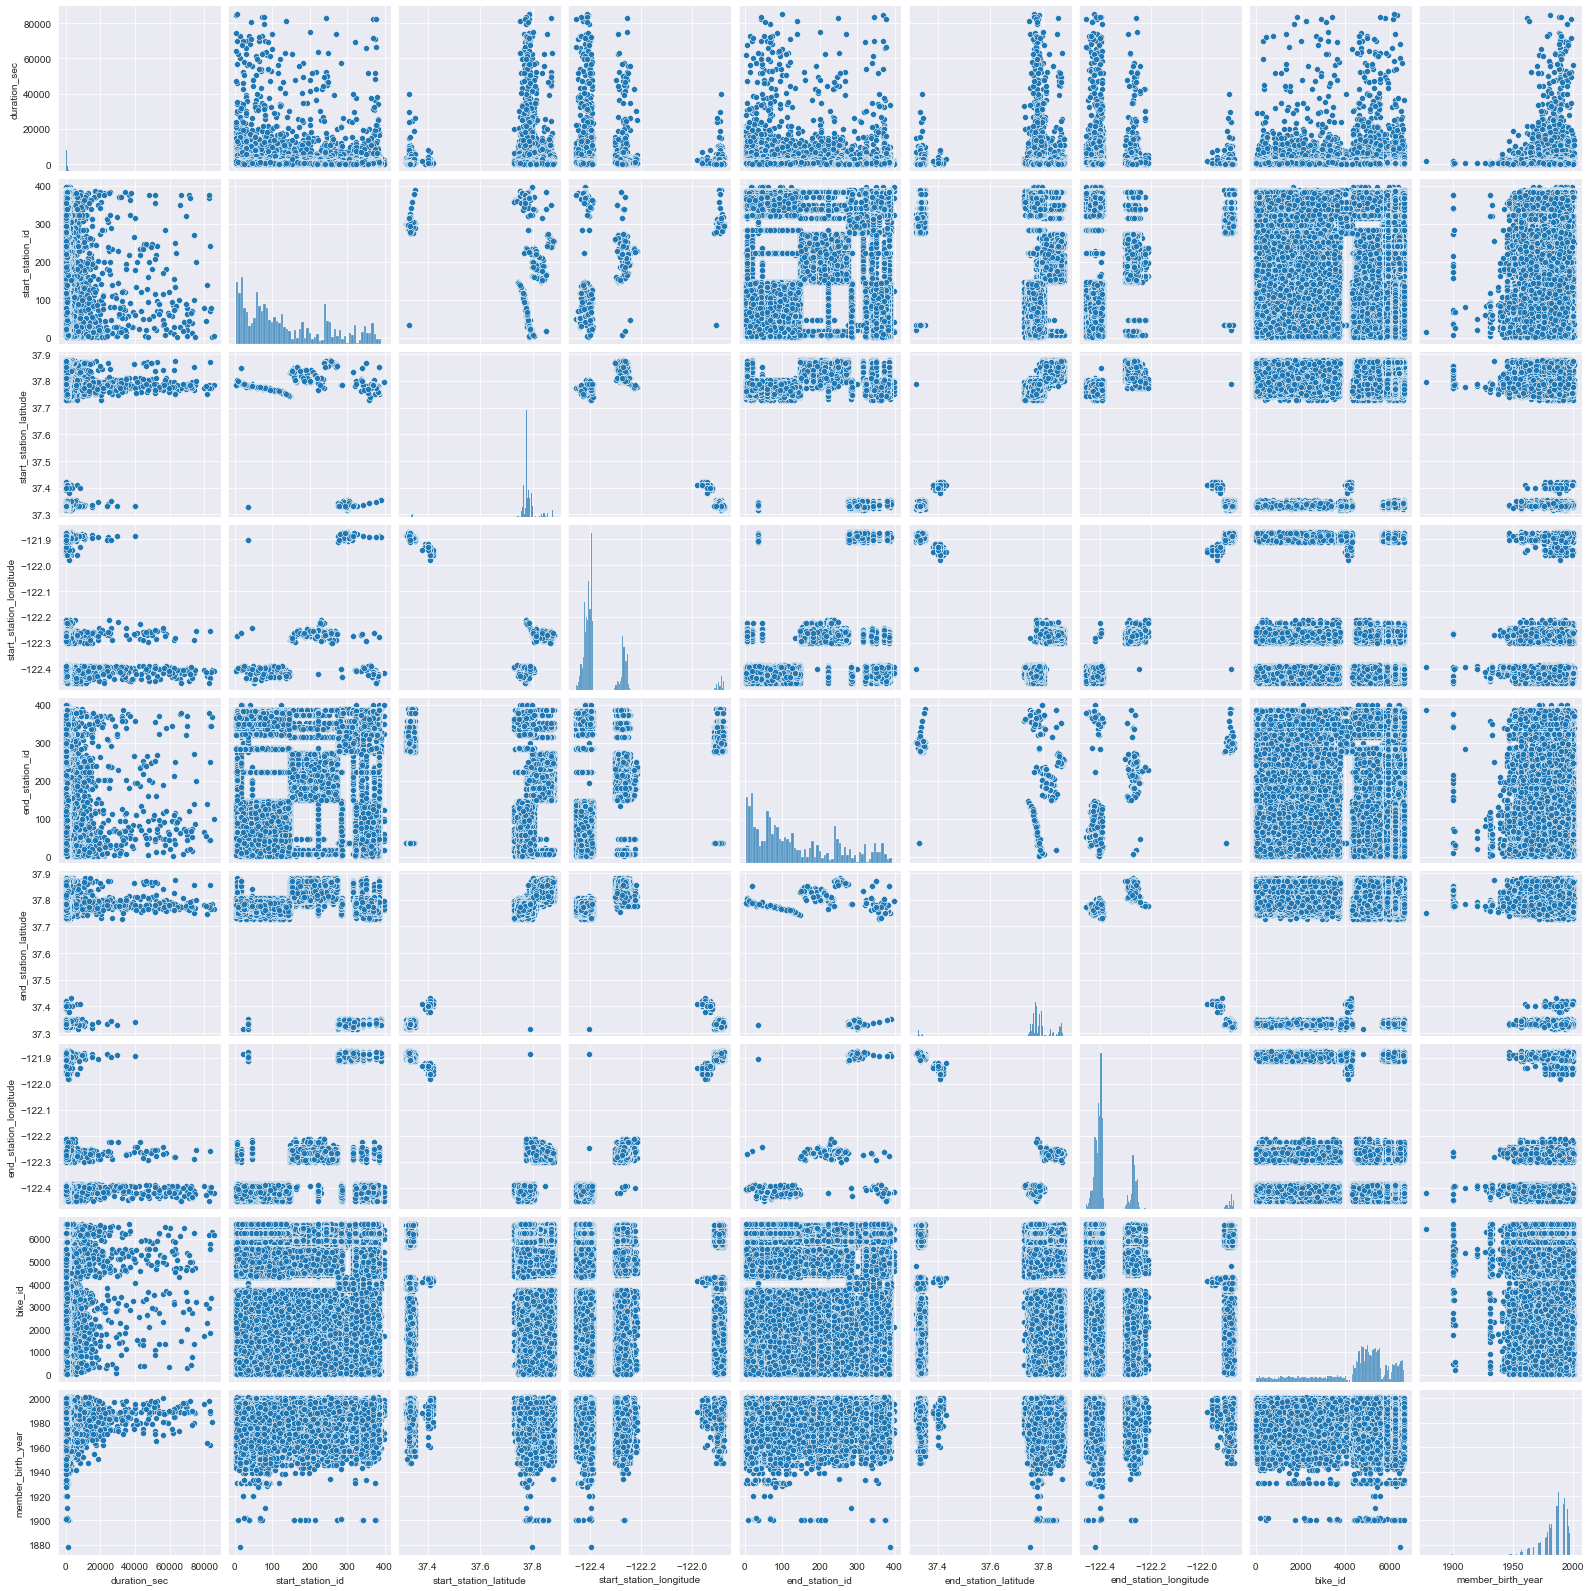

In [5]:
sns.pairplot(fdf);
# general look on the data to gain insights on the possible relations

## Univariate Exploration
### Investigate the null values in our data set for cleaning

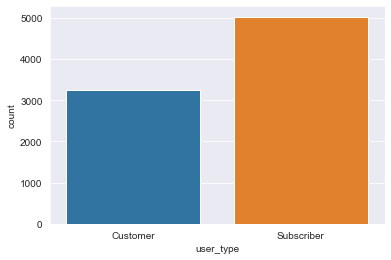

In [6]:
fna = fdf[fdf.member_gender.isna()]
sns.countplot(data=fna, x='user_type');
# Finding the count of null values per user type

It could be reasonable for unsubscribed custemers to skip some required data regesteriation,
but even significant subscribers count don't share gender and age related data,
which is collective data not meta data. It won't affect much and would be easier to
neglect these records, after all they're only 0.03 of the data

In [7]:
fst = fdf[fdf.end_station_id.isna()]
fst.shape
# getting the null values dataset shape 

(197, 16)

In [8]:
fdf = fdf.dropna()
fdf.shape
# getting the dataset shape after dropping the nullvalues

(174952, 16)

Also a 195 station name and id are not yet coded, only location, so dropping

### Find the frequancy of trips per gender and user type seperately

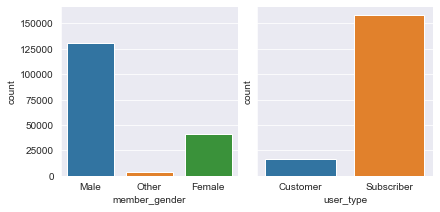

In [9]:
# plotting pairgrid with barplot to see the count per gender and user type
ga = sns.PairGrid(fdf, height=3,
                x_vars=['member_gender', 'user_type'],
                y_vars=['bike_id'])
gax = ga.map(sns.barplot, estimator=len)
gax.set(ylabel='count');

It seems like Male make more trips than female, and unsubscribed users are way less than subscribed.
Wondering what would show if conbined on one graph, to see whish is more unsubscribed users from male or female

## Find the distribution of different user ages (birth year of members using the service)

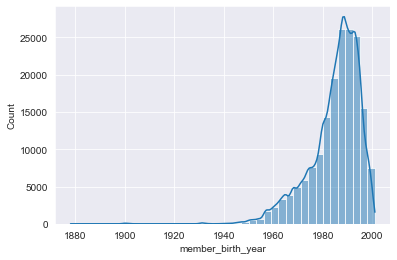

In [10]:
# showing the count of users birth year in histplot
sns.histplot(data=fdf, x='member_birth_year', kde=True, binwidth=3);

This distribution clearly represents the differant age groups using the service.
May be another plot would present it better, and hide the outfliers data

## Find the most popular starting stations

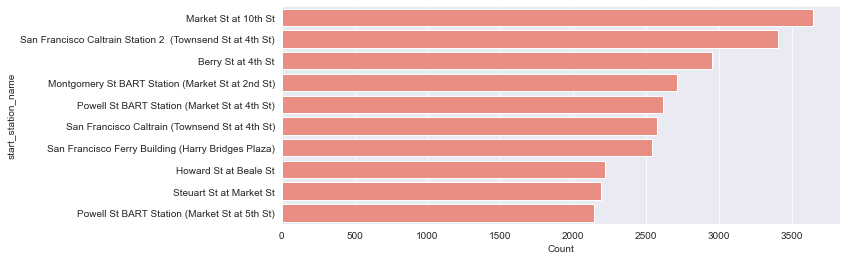

In [11]:
# creating a new 'sts' dataset to filter by sorting through most visited stations
sts = fdf.groupby(['start_station_name'])['start_station_name'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False).head(10)
plt.figure(figsize=(10,4))
# plotting horizontal barplot to the 10 most visited stations 
sns.barplot(data=sts, y='start_station_name', x='Count', color="salmon");

## Find the most popular ending stations

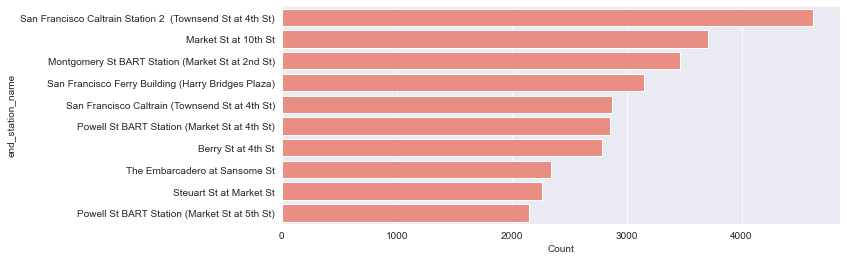

In [12]:
# creating a new 'sts' dataset to filter by sorting through most visited stations
sts = fdf.groupby(['end_station_name'])['end_station_name'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False).head(10)
plt.figure(figsize=(10,4))
# plotting horizontal barplot to the 10 most visited stations 
sns.barplot(data=sts, y='end_station_name', x='Count', color="salmon");

looks like the two most popular starting and ending stations are:
San Francisco Caltrain Station 2, and Market St at 10th St.

## Find the distribution of trip durations

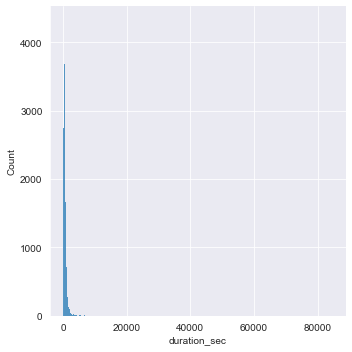

In [13]:
# finding the distribution of trip durations
sns.displot(fdf.duration_sec);

It seems that theres a very skewed distribution, outfliers data has to be handeled to conclude something

## Preparing date time columns for analysis

In [14]:
# editing dataframe option to allow editing column types and creat new columns
pd.options.mode.chained_assignment = None 
# changing the time columns' type from object to datetime
fdf.start_time = pd.to_datetime(fdf.start_time)
fdf.end_time = pd.to_datetime(fdf.end_time)
# creating new fields with part of the time to groupby later
fdf['start_day'] = fdf.start_time.dt.day_name()
# fdf['end_day'] = fdf.end_time.dt.day_name()
fdf['start_hour'] = fdf.start_time.dt.hour
# fdf['end_hour'] = fdf.end_time.dt.hour
fdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23


In [15]:
fdf.info(), fdf.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

(None, (174952, 18))

## Find frequancy of trip along the week days

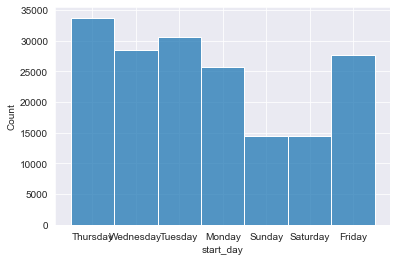

In [16]:
# distibution of service trips made on week days
sns.histplot(data=fdf, x='start_day');

looks like on Tuesday, and Thursday we have a peak. This could vary considering other factors like gender, or hour

## Find frequancy of trip along the day hours

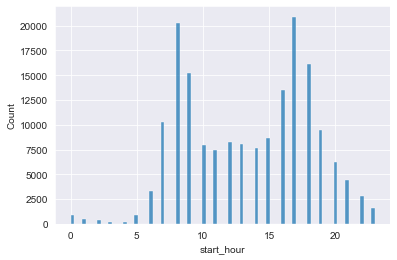

In [17]:
# distibution of service trips made on day hours
sns.histplot(data=fdf, x='start_hour');

As for the 24hours, it's obviously peaking at 8am and 5pm

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some observations obtained including, presence of null values that were analysed and cleaned, some outfliers data that were noticed to be dealt with, and some other useful findings

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> time date data were modified to extract more analysable data.

## Bivariate Exploration
### Find the frequancy of trips per gender and user type

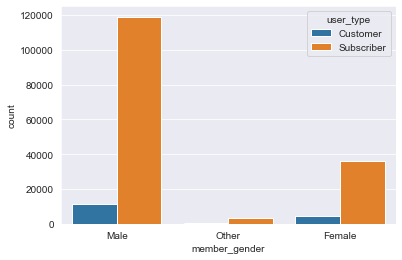

In [18]:
# count of service users per gender and user type
sns.countplot(data=fdf, x='member_gender', hue='user_type');

the relation between unsubscribed users from males and females are almost equal

## Find frequancy of trip along the week days by gender

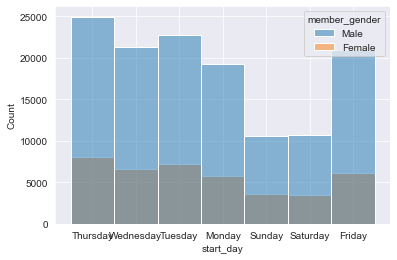

In [19]:
# distibution of service trips made on week days separated by gender
sns.histplot(data=fdf[fdf.member_gender!='Other'], x='start_day', hue='member_gender');

Even after gender split, still Tuesday, and Thursday are the peaked trips

### Find average trip durations per gender and user type

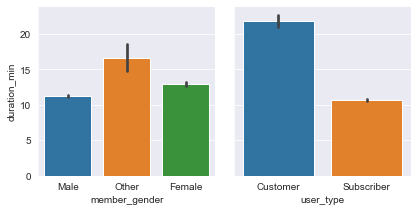

In [20]:
# Also would be better to display trip durations in minutes
fdf['duration_min'] = round(fdf['duration_sec']/60)
# plotting barplot in pairgridd to display trip times per user type and gernder
gb = sns.PairGrid(fdf, height=3,
                 x_vars=['member_gender', 'user_type'],
                 y_vars=['duration_min'])
gb.map(sns.barplot);

It's surprising to know that the heighest trip durations are not gender specified (unsubscriped users)

## Find average trip duration for different members ages

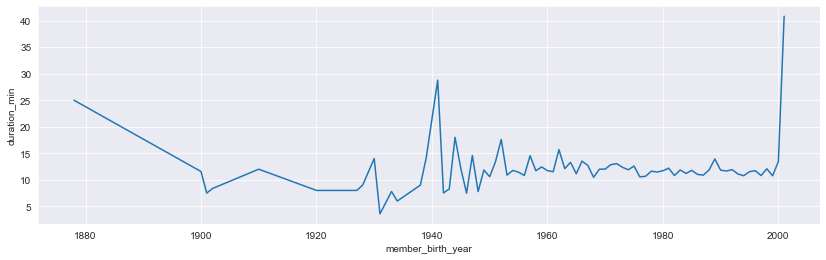

In [21]:
plt.figure(figsize=(14,4))
# showing the average trip time per user birth year 
sns.lineplot(data=fdf, x='member_birth_year', y='duration_min', ci=None);
# not quite clear how some user birth year data are so far back to 1880!!. 1940, I can understand
# outfliars data could be trimmed in explaintory part

seems like middle age don't have much time for riding bikes, the peaks are for the elderly and youth. It's also strange that some user data has birth dates back to 1880. if this is a new service, I guess users are delbrately falsifing their data. We need to gain more trust.

## Find distribution of trip durations along the day hours

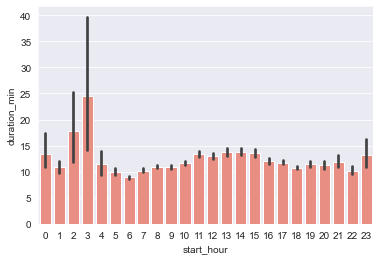

In [22]:
# showing trip time frequency on day hours
sns.barplot(data=fdf, x='start_hour', y='duration_min', color='salmon');

the heighest trip duration average is at 3am. this looks like for sport or some underground secret delivery system. It would mean alot to dig deeper at the user data and stations routed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the difference in observations per gender is eye catching, also how differant are the ages of the users

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In fact, it would be nice to see on a heat map the crowded times per day and week

## Multivariate Exploration
## Testing the density of popular stations on a heatmap

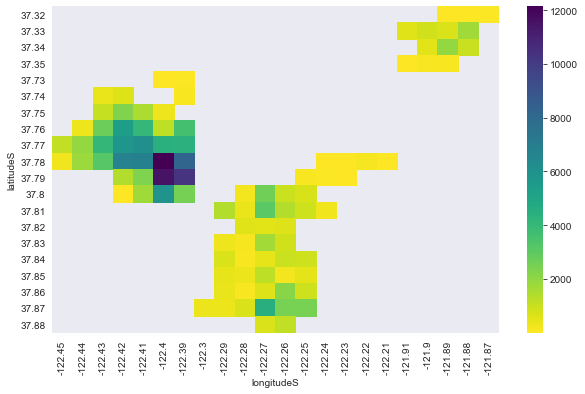

In [23]:
# creating new longitude and latitude fields in the dataset to split count of trips in steps
fdf['latitudeS'] = round(fdf['start_station_latitude'], 2)
fdf['longitudeS'] = round(fdf['start_station_longitude'], 2)
plt.figure(figsize=(10,6))
# creating pivot table to use for the heatmap
hs = fdf.pivot_table(index='latitudeS',
                   columns='longitudeS',
                   values='bike_id',
                   aggfunc=len)
hsx = sns.heatmap(hs, cmap="viridis_r")

Not much could be gained from this heatmap, except knowing the actual location where service is mostly used

## Testing the crowed times on a heatmap

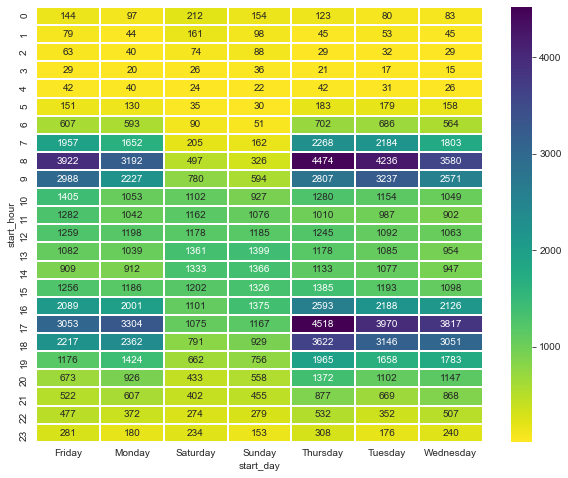

In [24]:
plt.figure(figsize=(10,8))
# creating pivot table to use for the heatmap
hs = fdf.pivot_table(index='start_hour',
                   columns='start_day',
                   values='bike_id',
                   aggfunc=len)
hsx = sns.heatmap(hs, cmap="viridis_r", linewidths=1 ,fmt='.0f', annot=True)

Again this confirms the rush hour time, and the peaked day during the week

## Find the average trip duration along day hours, split using gender

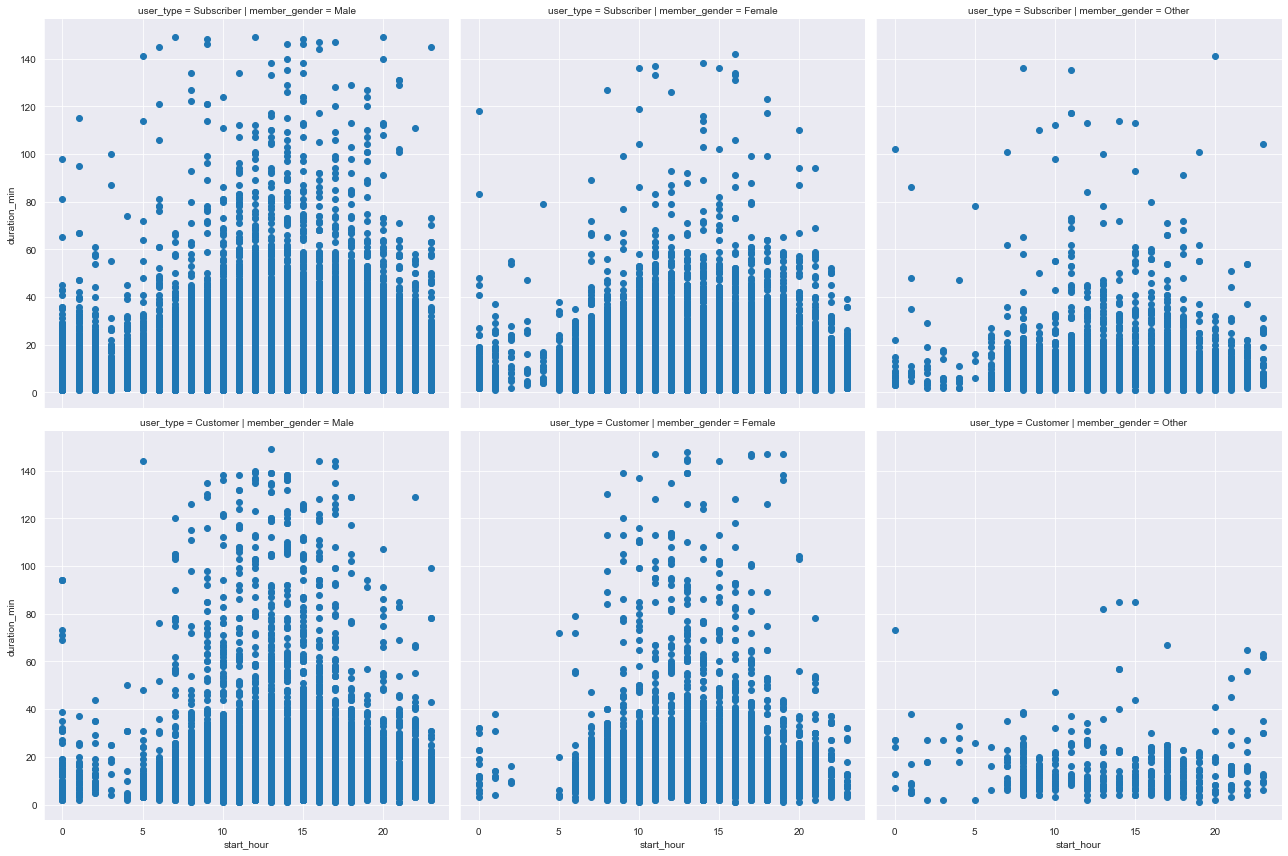

In [25]:
# for better visualization, trip durations better not show outfliars data
filt_fdf = fdf[fdf['duration_min']<150]
# see scatterplot in grid 
fg = sns.FacetGrid(filt_fdf, col='member_gender', row='user_type', height=6)
fg.map(plt.scatter, 'start_hour', 'duration_min');

## Find the average trip duration along week days, split using gender and type

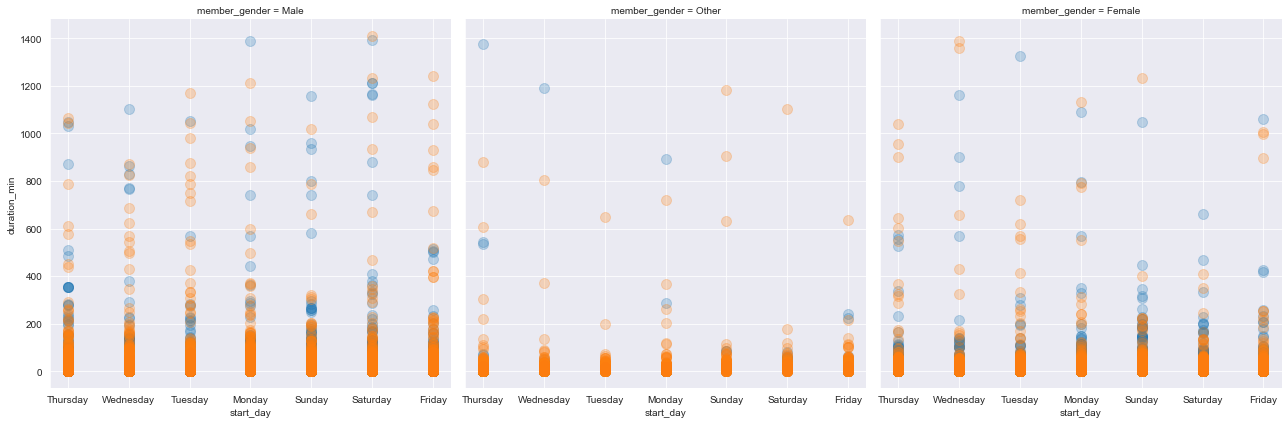

In [26]:
# adding some keyword arguments for the scatterplot
kws = dict(alpha=0.25, s=100)
fg = sns.FacetGrid(fdf, col='member_gender', hue='user_type', height=6)
fg.map(plt.scatter, 'start_day', 'duration_min',  **kws);

Not quite representative, however, it shows average trip duration and that males use the service more. 

## See representation of the trip duration for genders and types

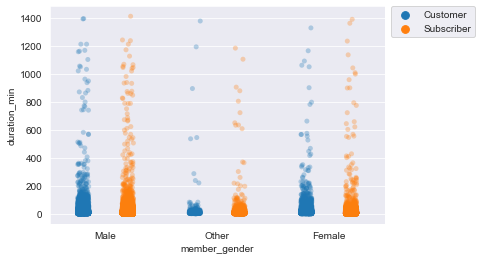

In [27]:
sns.stripplot(data=fdf, y='duration_min', x='member_gender', hue='user_type',
             jitter=True, dodge=True, alpha=0.3);
# adjusting the legend position
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Find distribution of trip durations along the week days for genders

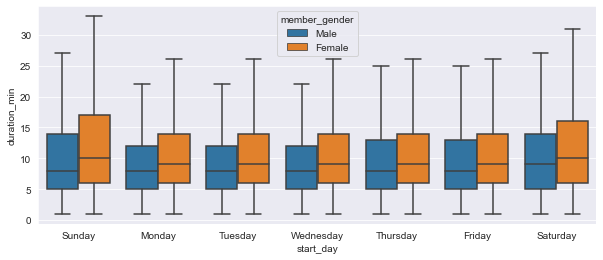

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(data=fdf[fdf.member_gender!='Other'], x='start_day', y='duration_min',
            hue='member_gender', showfliers=False,
           order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                        'Friday', 'Saturday']);

Okay, obviously, females spend more time on their trips along week days

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the time-day heat map shows clearly the crowded times. 

### Were there any interesting or surprising interactions between features?

> Not quite. No

# Explaintory Part

### Dataset structure

> More than 183000 records with 15 fields of data

### Main features of interest in dataset

> * Analyse the trip records per day-hour, and week-day.
> * Analyse duration per gender, user type, member birth year, and more.
> * Analyse stations with frequent service usage.
> * Analyse univariant plots for categorical data like user type

### Features in the dataset that support investigation into dataset features of interest

> The timing and duration field are probably the most important.
> Also the user data like gender and birth year will have some direct impact on our study

### Gender and Service Subscription Analysis

<Figure size 1152x432 with 0 Axes>

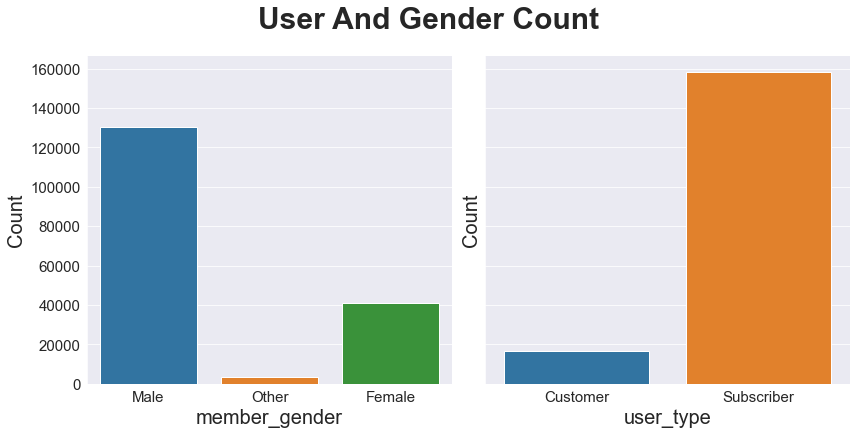

In [29]:
plt.figure(figsize=(16,6))
# using matplotlib to adjust the axes parameters
params = {"axes.labelsize":20, "xtick.labelsize":15, "ytick.labelsize":15}
mpl.rcParams.update(params)
ga = sns.PairGrid(fdf, height=6,
                x_vars=['member_gender', 'user_type'],
                y_vars=['bike_id'])
# adding suptitle to the grid
plt.suptitle('User and Gender Count'.title(), y=1, fontsize = 30, weight = "bold")
gax = ga.map(sns.barplot, estimator=len)
gax.set(ylabel='Count')
plt.tight_layout();

* Most of the service users are subscribed users.
* Also males make more trips than females.
> May be females would be targeted in marketing campaigns, especially when noticing the following average trip durations study.

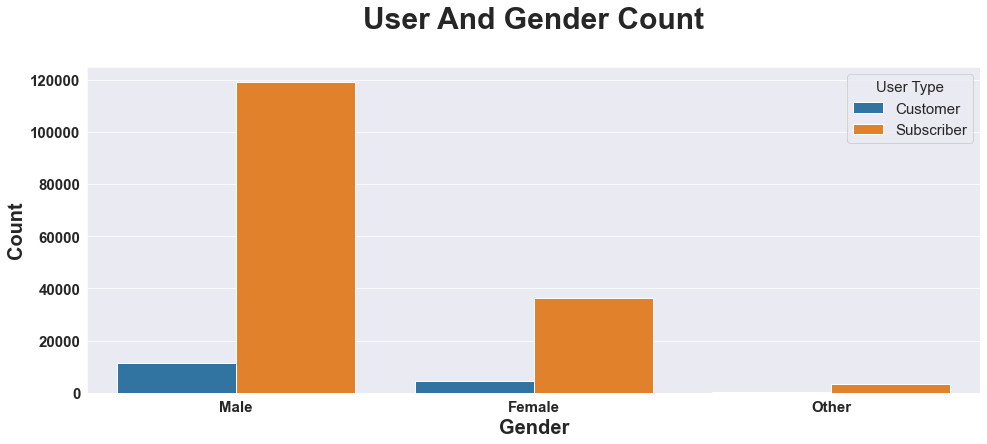

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(x='member_gender', data=fdf, hue='user_type',
           order=['Male', 'Female', 'Other'])
# fixing the labels, fontsizes, lengend, and axes ticks
plt.title('User and Gender Count\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(np.arange(0,120001,20000), fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Gender'.title(), fontsize=20, weight="bold")
plt.ylabel('Count'.title(), fontsize=20, weight="bold")
plt.legend(title="User Type", title_fontsize=15, fontsize=15);

Side by side comparison between users type and gender

### Gender and Service Subscription Trip Duration

<Figure size 1152x432 with 0 Axes>

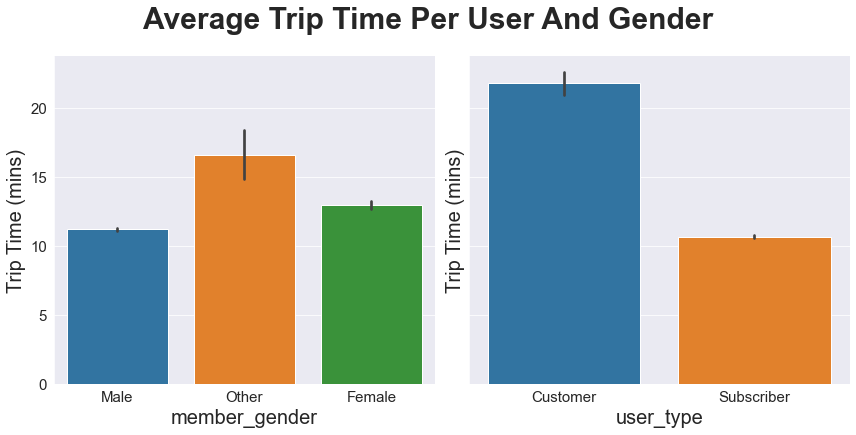

In [31]:
fdf['duration_min'] = round(fdf['duration_sec']/60)
plt.figure(figsize=(16,6))
gb = sns.PairGrid(fdf, height=6,
                x_vars=['member_gender', 'user_type'],
                y_vars=['duration_min'])
plt.suptitle('Average Trip Time per User and Gender'.title(), y=1, fontsize = 30, weight = "bold")
gbx = gb.map(sns.barplot)
gbx.set(ylabel='Trip Time (mins)')
plt.tight_layout();

* Females tend to spend more time on their trips
* Also unsubscriped customers tend to spend on average more time on their trips.
* (gender "Other") and missing data like birth year also record more trip time durations
> This may refer to inconvenient in regestration process, knowing that gender "Others" and type "Customer" tend spend significant time on their trips.

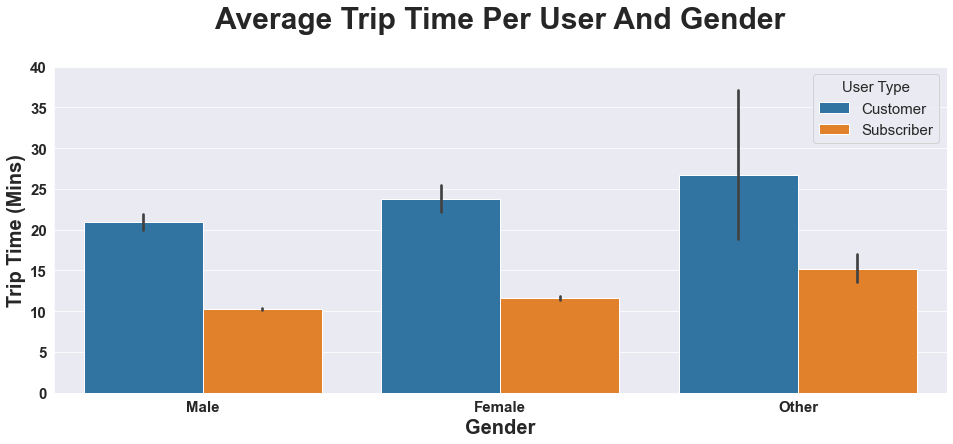

In [32]:
plt.figure(figsize=(16,6))
sns.barplot(x='member_gender', y='duration_min', data=fdf, hue='user_type',
           order=['Male', 'Female', 'Other'])
plt.title('Average Trip Time per User and Gender\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(np.arange(0,41,5), fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Gender'.title(), fontsize=20, weight="bold")
plt.ylabel('Trip Time (mins)'.title(), fontsize=20, weight="bold")
plt.legend(title="User Type", title_fontsize=15, fontsize=15);

Side by side comparison between users type and gender in regards to trip time

### Duration time distribution

<Figure size 1152x432 with 0 Axes>

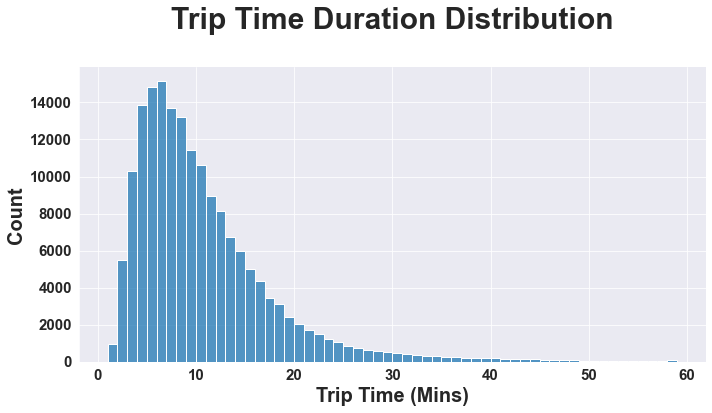

In [33]:
dur_fdf = fdf[fdf['duration_min']<60]
plt.figure(figsize=(16,6))
sns.displot(data=dur_fdf, aspect=2, x='duration_min', binwidth=1)
plt.title('Trip Time Duration Distribution\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Trip Time (mins)'.title(), fontsize=20, weight="bold")
plt.ylabel('Count'.title(), fontsize=20, weight="bold");

This shows that the average timp times are between a minute and half an hour

### Users Birth Year Analysis

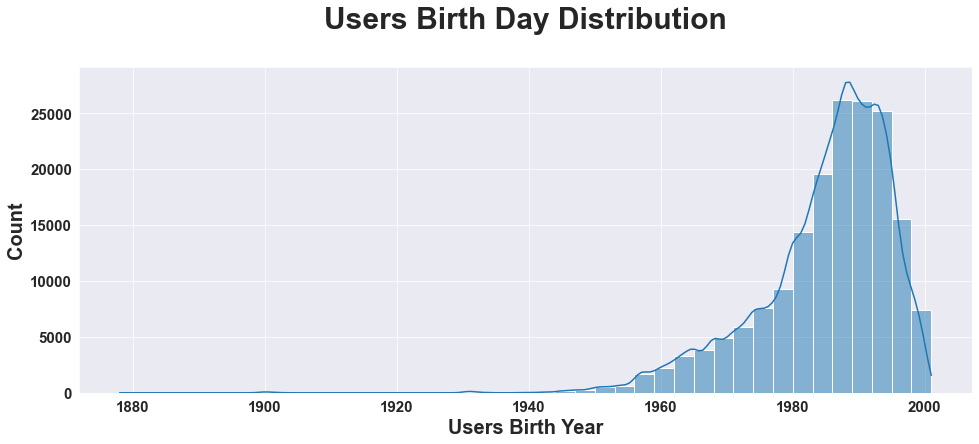

In [34]:
plt.figure(figsize=(16,6))
sns.histplot(data=fdf, x='member_birth_year', kde=True, binwidth=3)
plt.title('Users Birth Day Distribution\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Users Birth Year'.title(), fontsize=20, weight="bold")
plt.ylabel('Count'.title(), fontsize=20, weight="bold");

Most of the service users are born between 80, and 92

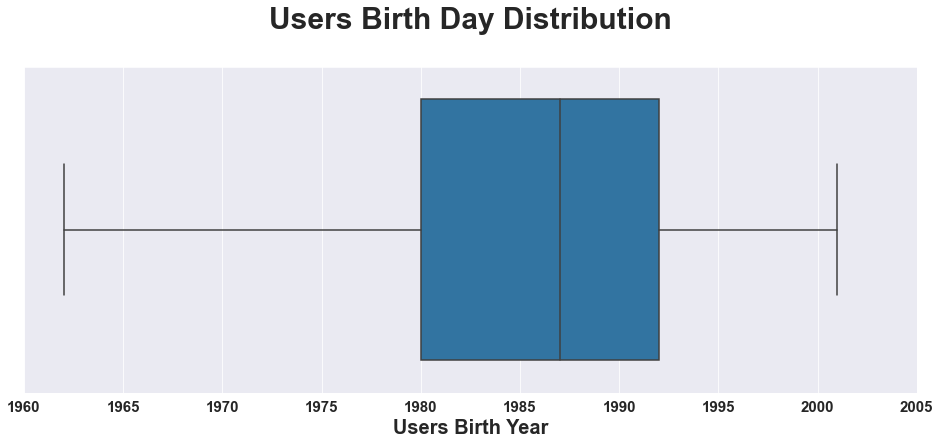

In [35]:
plt.figure(figsize=(16,6))
sns.boxplot(data=fdf, x='member_birth_year', showfliers=False)
plt.title('Users Birth Day Distribution\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(np.arange(1960,2006,5), fontsize=15, fontweight='bold')
plt.xlabel('Users Birth Year'.title(), fontsize=20, weight="bold");

This boxplot shows the distribution of service users birth year

### Time Trip Analysis per Users birth year

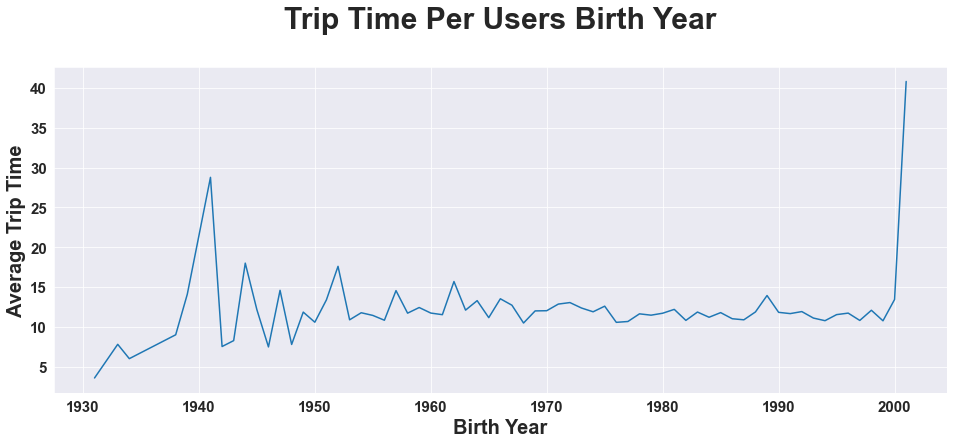

In [36]:
# trimming the fliers data with a new dataframe filter
brth_fdf = fdf[fdf['member_birth_year']>1930]
plt.figure(figsize=(16,6))
sns.lineplot(data=brth_fdf, x='member_birth_year', y='duration_min', ci=None)
plt.title('Trip Time per Users Birth Year\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Birth Year'.title(), fontsize=20, weight="bold")
plt.ylabel('Average Trip Time'.title(), fontsize=20, weight="bold");

However, people from other birth years spend signifcant time in their trips, back to the year of 1940.

### Daily frequent hours of service usage

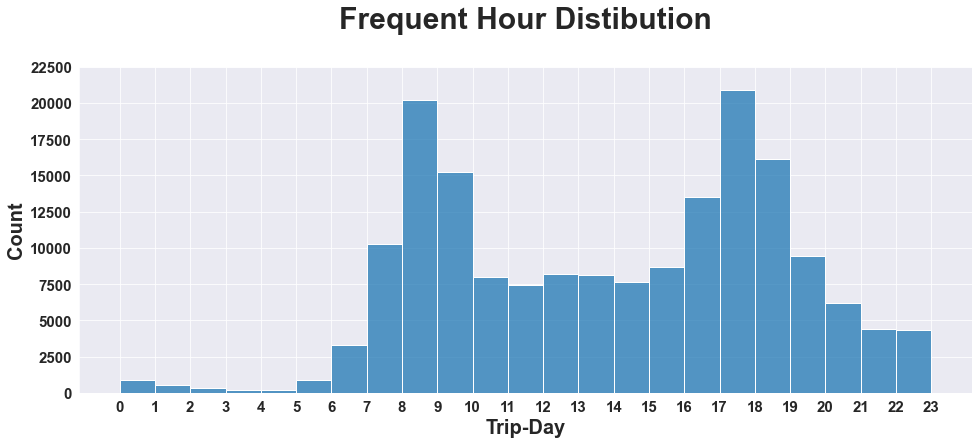

In [37]:
plt.figure(figsize=(16,6))
sns.histplot(data=fdf, x='start_hour', binwidth=1)
plt.title('Frequent Hour Distibution\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(np.arange(24), fontsize=15, fontweight='bold')
plt.yticks(np.arange(0,22501,2500), fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Trip-Day'.title(), fontsize=20, weight="bold")
plt.ylabel('Count'.title(), fontsize=20, weight="bold");

Most trips are at the time of 8 am, and 5 pm.

### Weekly frequent Days of service usage

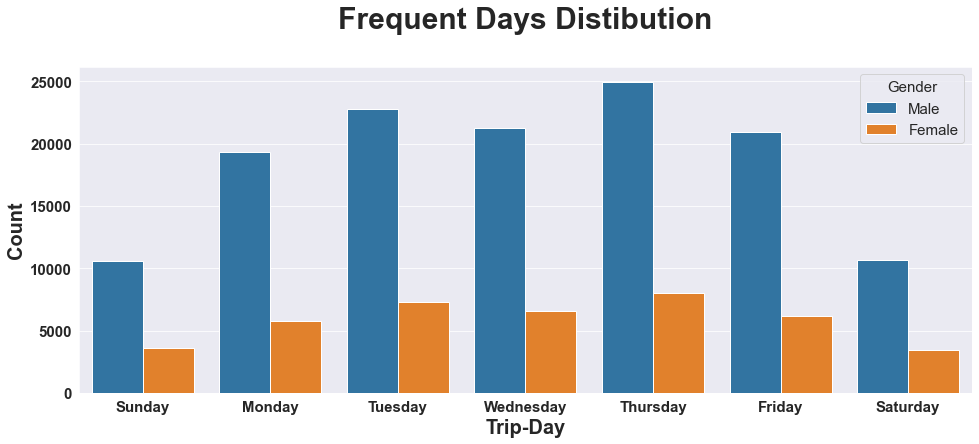

In [38]:
plt.figure(figsize=(16,6))
sns.countplot(x='start_day',
            data=fdf[fdf.member_gender!='Other'], hue='member_gender',
            order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                        'Friday', 'Saturday'])
plt.title('Frequent Days Distibution\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(np.arange(0,25001,5000), fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Trip-Day'.title(), fontsize=20, weight="bold")
plt.ylabel('Count'.title(), fontsize=20, weight="bold")
plt.legend(title="Gender", title_fontsize=15, fontsize=15);

Most of trips are on Thursday

### Weekly Frequent times and days on a Heatmap

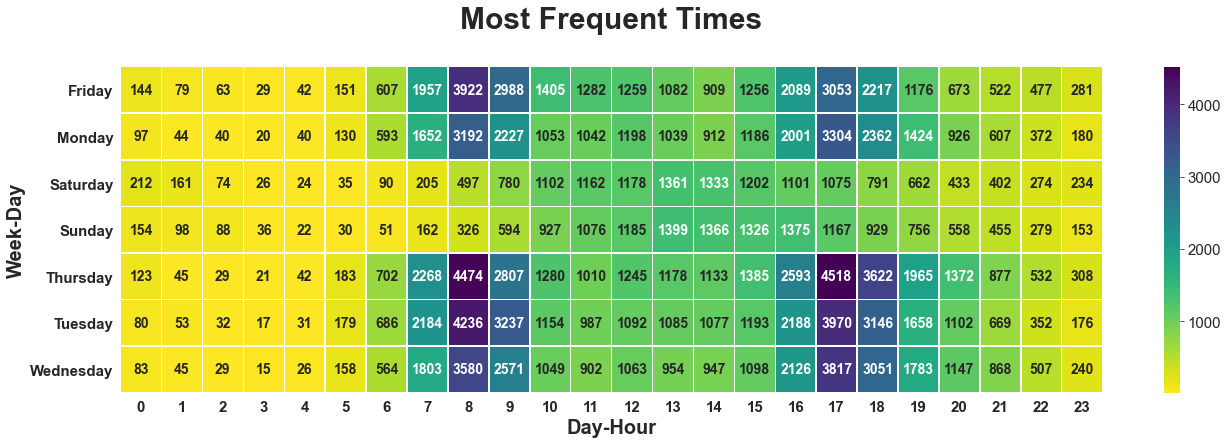

In [39]:
plt.figure(figsize=(22,6))
hs = fdf.pivot_table(index='start_day',
                   columns='start_hour',
                   values='bike_id',
                   aggfunc=len)
hs.index = pd.CategoricalIndex(hs.index, categories=['Sunday', 'Monday', 'Tuesday',
                                    'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hsx = sns.heatmap(hs, cmap="viridis_r", linewidths=.5 ,fmt='.0f',
                  annot=True, annot_kws={'fontsize':14, 'fontweight':'bold'})
plt.title('Most Frequent Times\n'.title(), fontsize = 30, weight = "bold")
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Day-hour'.title(), fontsize=20, weight="bold")
plt.ylabel('Week-day'.title(), fontsize=20, weight="bold");

This shows the dense times along the week in hours and days

### Most popular starting stations

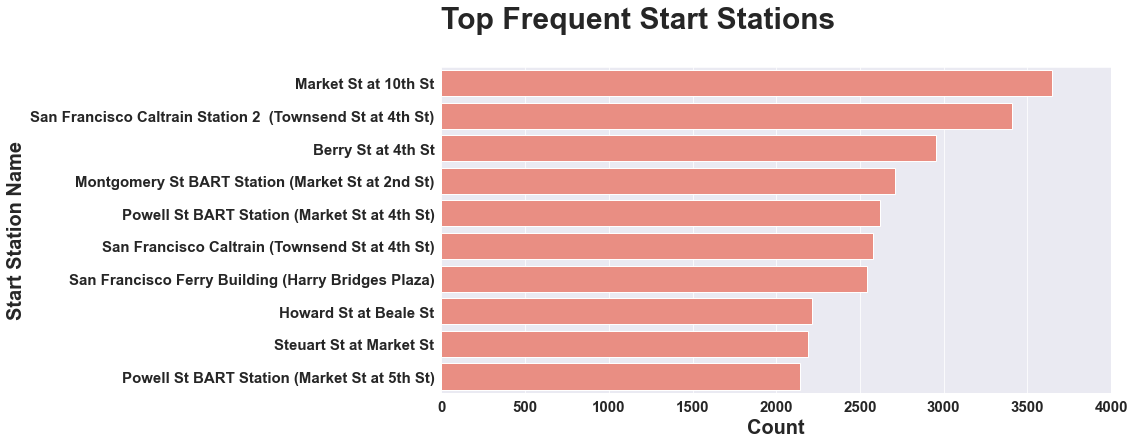

In [40]:
sts = fdf.groupby(['start_station_name'])['start_station_name'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False).head(10)
sts.head()
plt.figure(figsize=(12,6))
sns.barplot(data=sts, y='start_station_name', x='Count', color="salmon")
plt.title('Top Frequent Start Stations\n'.title(), loc='left', fontsize = 30, weight = "bold")
plt.xticks(np.arange(0,4001, 500), fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Count'.title(), fontsize=20, weight="bold")
plt.ylabel('Start Station Name'.title(), fontsize=20, weight="bold");

Most popular starting stations are: San Francisco Caltrain Station 2, and Market St at 10th St,

### Most popular ending stations are

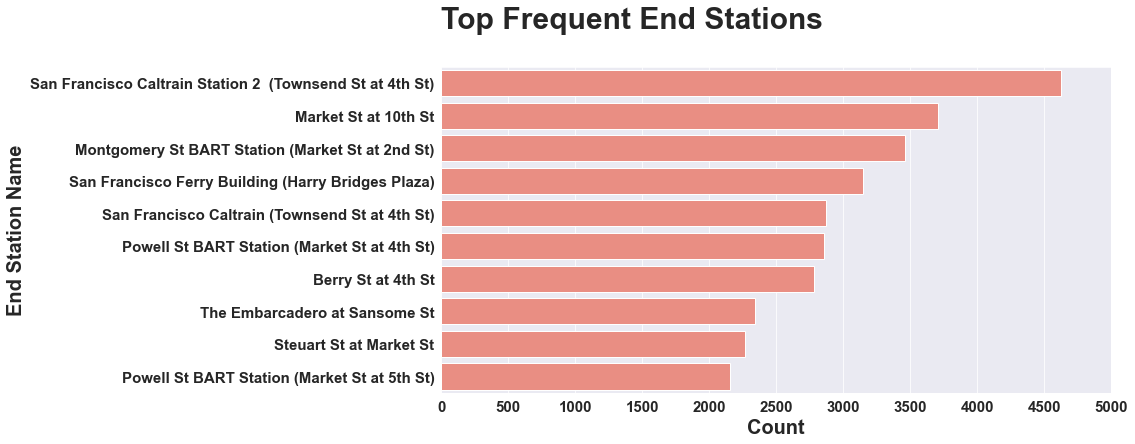

In [41]:
# Add title and format it
sts = fdf.groupby(['end_station_name'])['end_station_name'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False).head(10)
sts.head()
plt.figure(figsize=(12,6))
sns.barplot(data=sts, y='end_station_name', x='Count', color="salmon")
plt.title('Top Frequent End Stations\n'.title(), loc='left', fontsize = 30, weight = "bold")
plt.xticks(np.arange(0,5001,500), fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold', rotation=0)
plt.xlabel('Count'.title(), fontsize=20, weight="bold")
plt.ylabel('End Station Name'.title(), fontsize=20, weight="bold");

Most popular ending stations are: San Francisco Caltrain Station 2, and Market St at 10th St,
> which we can use to enhance the service targeting dense stations at crowd times with more bikes.

## Points that conculded with visualization
* Most of the service users are subscribed users
* Males make more trips than females. may be they'd be targeted in marketing campaigns, especially when noticing that;
* Females tend to spend more time on their trips
* Unspecified users (gender unknown) and missing data like birth year, may refer to inconvenient regestration process, knowing that gender "Others" tend spend significant time on their trips.
* Most of the service users are born between 82, and 94
* However, people from other birth years spend signifcant time in their trip durations, back to the year of 1940.
* Most trips are at the time of 8 am, and 5 pm
* Also, most of trips are on Thursday
* Most popular starting and ending stations are: San Francisco Caltrain Station 2, and Market St at 10th St, which we can use to enhance the service targeting dense stations at crowd times with more bikes.

# Thank You